<a href="https://colab.research.google.com/github/10varsha/Student-Performance-Prediction/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Student Performance Prediction/student-scores.csv')

In [ ]:
df.head()

id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

In [ ]:
df.drop(['part_time_job', "weekly_self_study_hours", 'history_score', 'biology_score', 'geography_score'], axis=1, inplace=True)
df.head()

id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   absence_days  extracurricular_activities   career_aspiration  math_score  \
0             3                       False              Lawyer          73   
1             2                       False              Doctor          90   
2             9                        True  Government Officer          81   
3             5                       False              Artist          71   
4             5                       False             Unknown          84   

   physics_score  chemistry_score  english_score  
0             93               97             80  
1             96              100             88  
2             95               96             77  
3             88               80             63  
4             65               65             74

In [ ]:
df.shape

(2000, 12)

**checking missing values**

In [ ]:
df.isna().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
absence_days                  0
extracurricular_activities    0
career_aspiration             0
math_score                    0
physics_score                 0
chemistry_score               0
english_score                 0
dtype: int64

There are no missing values in the data set

In [ ]:
#Check Duplicates
df.duplicated().sum()

0



**Check data types**

In [ ]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   absence_days                2000 non-null   int64 
 6   extracurricular_activities  2000 non-null   bool  
 7   career_aspiration           2000 non-null   object
 8   math_score                  2000 non-null   int64 
 9   physics_score               2000 non-null   int64 
 10  chemistry_score             2000 non-null   int64 
 11  english_score               2000 non-null   int64 
dtypes: bool(1), int64(6), object(5)
memory usage: 174.0+ KB


Checking the number of unique values of each column

In [ ]:
df.nunique()

id                            2000
first_name                     453
last_name                      707
email                         2000
gender                           2
absence_days                    11
extracurricular_activities       2
career_aspiration               17
math_score                      61
physics_score                   50
chemistry_score                 51
english_score                   50
dtype: int64

**Check statistics of data set**

In [ ]:
df.describe()

id  absence_days   math_score  physics_score  chemistry_score  \
count  2000.000000   2000.000000  2000.000000    2000.000000      2000.000000   
mean   1000.500000      3.665500    83.452000      81.336500        79.995000   
std     577.494589      2.629271    13.224906      12.539453        12.777895   
min       1.000000      0.000000    40.000000      50.000000        50.000000   
25%     500.750000      2.000000    77.000000      71.000000        69.000000   
50%    1000.500000      3.000000    87.000000      83.000000        81.000000   
75%    1500.250000      5.000000    93.000000      92.000000        91.000000   
max    2000.000000     10.000000   100.000000     100.000000       100.000000   

       english_score  
count    2000.000000  
mean       81.277500  
std        12.027087  
min        50.000000  
25%        72.000000  
50%        83.000000  
75%        91.000000  
max        99.000000

**Exploring Data**

In [ ]:
df.head()

id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   absence_days  extracurricular_activities   career_aspiration  math_score  \
0             3                       False              Lawyer          73   
1             2                       False              Doctor          90   
2             9                        True  Government Officer          81   
3             5                       False              Artist          71   
4             5                       False             Unknown          84   

   physics_score  chemistry_score  english_score  
0             93               97             80  
1             96              100             88  
2             95               96             77  
3             88               80             63  
4             65               65             74

In [ ]:
print("Categories in 'gender' variable:", end = " ")
print(df['gender'].unique())

print("Categories in 'extracurricular_activities' variable:",end=" ")
print(df['extracurricular_activities'].unique())

print("Categories in 'career_aspiration' variable:",end=" " )
print(df['career_aspiration'].unique())



Categories in 'gender' variable: ['male' 'female']
Categories in 'extracurricular_activities' variable: [False  True]
Categories in 'career_aspiration' variable: ['Lawyer' 'Doctor' 'Government Officer' 'Artist' 'Unknown'
 'Software Engineer' 'Teacher' 'Business Owner' 'Scientist' 'Banker'
 'Writer' 'Accountant' 'Designer' 'Construction Engineer' 'Game Developer'
 'Stock Investor' 'Real Estate Developer']


In [ ]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' or df[feature].dtype == 'bool']

# Print columns
print('{} numerical features: {}'.format(len(numeric_features), numeric_features))
print('{} categorical features: {}'.format(len(categorical_features), categorical_features))


6 numerical features: ['id', 'absence_days', 'math_score', 'physics_score', 'chemistry_score', 'english_score']
6 categorical features: ['first_name', 'last_name', 'email', 'gender', 'extracurricular_activities', 'career_aspiration']


Adding columns for "Total Score" and "Average"

In [ ]:
df['total score'] = df['math_score'] + df['physics_score'] + df['chemistry_score'] + df['english_score']
df['average'] = df['total score']/4
df.head()

id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   absence_days  extracurricular_activities   career_aspiration  math_score  \
0             3                       False              Lawyer          73   
1             2                       False              Doctor          90   
2             9                        True  Government Officer          81   
3             5                       False              Artist          71   
4             5                       False             Unknown          84   

   physics_score  chemistry_score  english_score  total score  average  
0             93               97             80          343    85.75  
1             96              100             88          374    93.50  
2             95               96             77          349    87.25  
3             88               80             63          302    75.50  
4             65               65             74          288    72.00

# Exploring Data ( Visualization )


In [ ]:
# Checking the number of students with full marks

math_full = df[df['math_score'] == 100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')

physics_full = df[df['physics_score'] == 100]['average'].count()
print(f'Number of students with full marks in Physics: {physics_full}')

chemistry_full = df[df['chemistry_score'] == 100]['average'].count()
print(f'Number of students with full marks in Chemistry: {chemistry_full}')

english_full = df[df['english_score'] == 100]['average'].count()
print(f'Number of students with full marks in English: {english_full}')

Number of students with full marks in Maths: 77
Number of students with full marks in Physics: 60
Number of students with full marks in Chemistry: 50
Number of students with full marks in English: 0


In [ ]:
# Checking the number of students with score less than 50

math_less_50 = df[df['math_score'] <= 50]['average'].count()
print(f'Number of students with less than 50 marks in Maths: {math_less_50}')

physics_less_50 = df[df['physics_score'] <= 50]['average'].count()
print(f'Number of students with less than 50 marks in Physics: {physics_less_50}')

chemistry_less_50 = df[df['chemistry_score'] <= 50]['average'].count()
print(f'Number of students with less than 50 marks in Chemistry: {chemistry_less_50}')

english_less_50 = df[df['english_score'] <= 50]['average'].count()
print(f'Number of students with less than 50 marks in English: {english_less_50}')

Number of students with less than 50 marks in Maths: 59
Number of students with less than 50 marks in Physics: 9
Number of students with less than 50 marks in Chemistry: 9
Number of students with less than 50 marks in English: 8


Insights
From above values we get students have performed the worst in Maths
Best performance is in English section

# Exploring Data ( Visualization )
Visualize average score distribution to make some conclusion.


*   Histogram
*   Kernel Distribution Function (KDE)






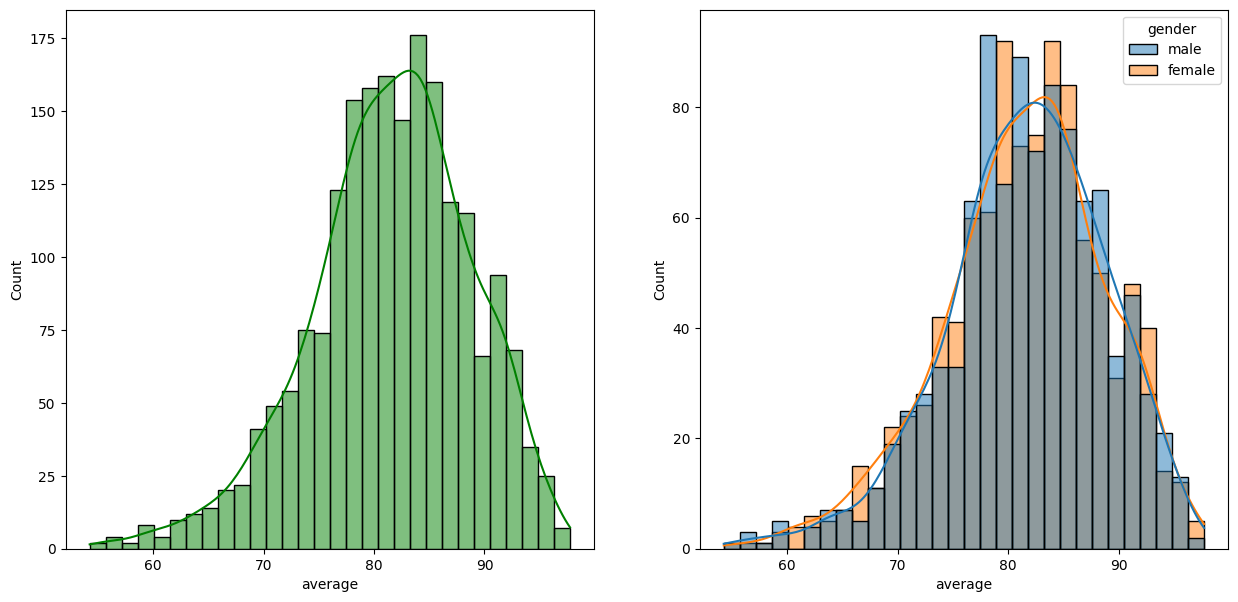

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x='average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

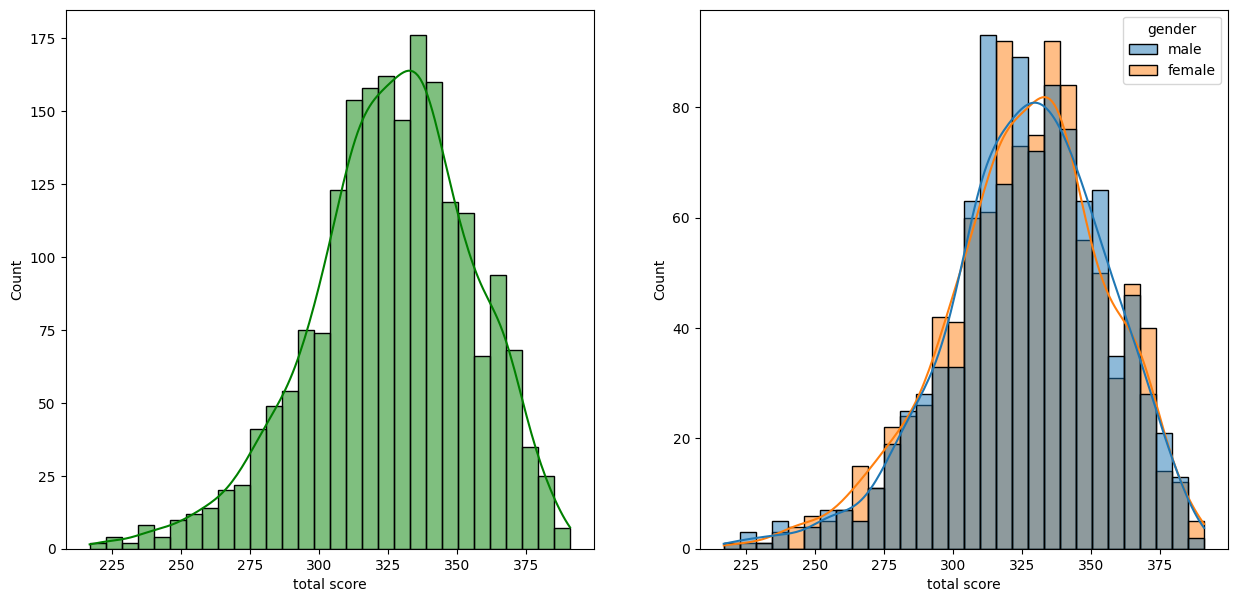

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x='total score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total score', kde = True, hue = 'gender')
plt.show()

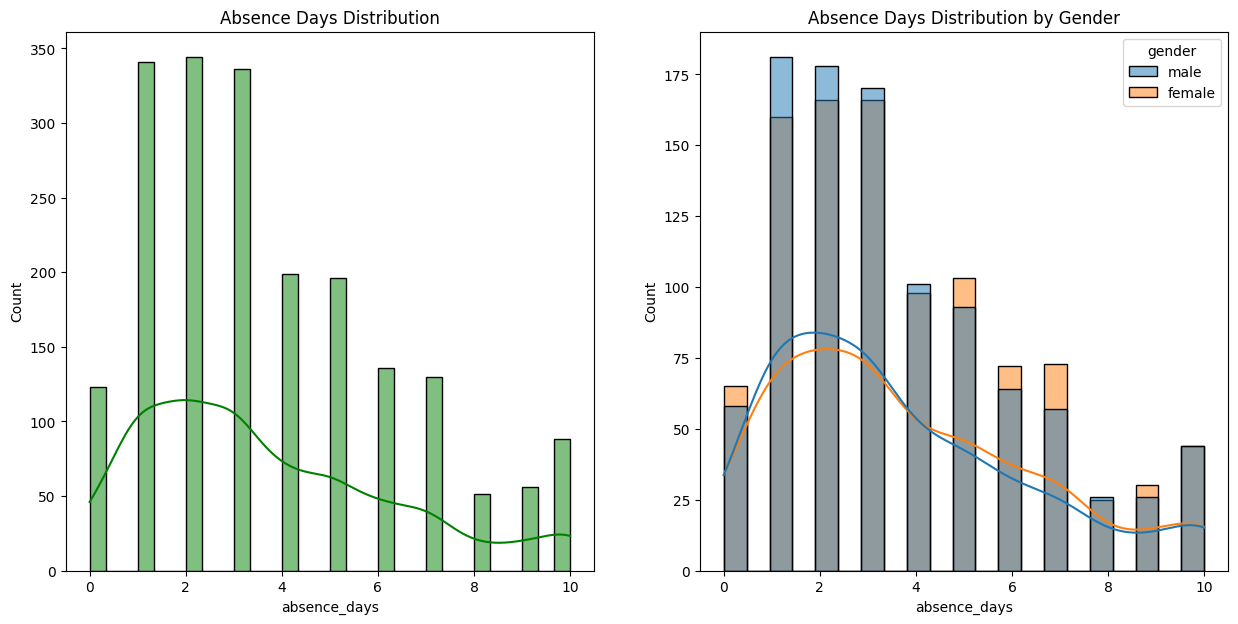

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot - Histogram of 'absence_days'
plt.subplot(121)
sns.histplot(data=df, x='absence_days', bins=30, kde=True, color='g')
plt.title('Absence Days Distribution')

# Second subplot - You could use a categorical variable as the hue
plt.subplot(122)
sns.histplot(data=df, x='absence_days', kde=True, hue='gender')
plt.title('Absence Days Distribution by Gender')

plt.show()


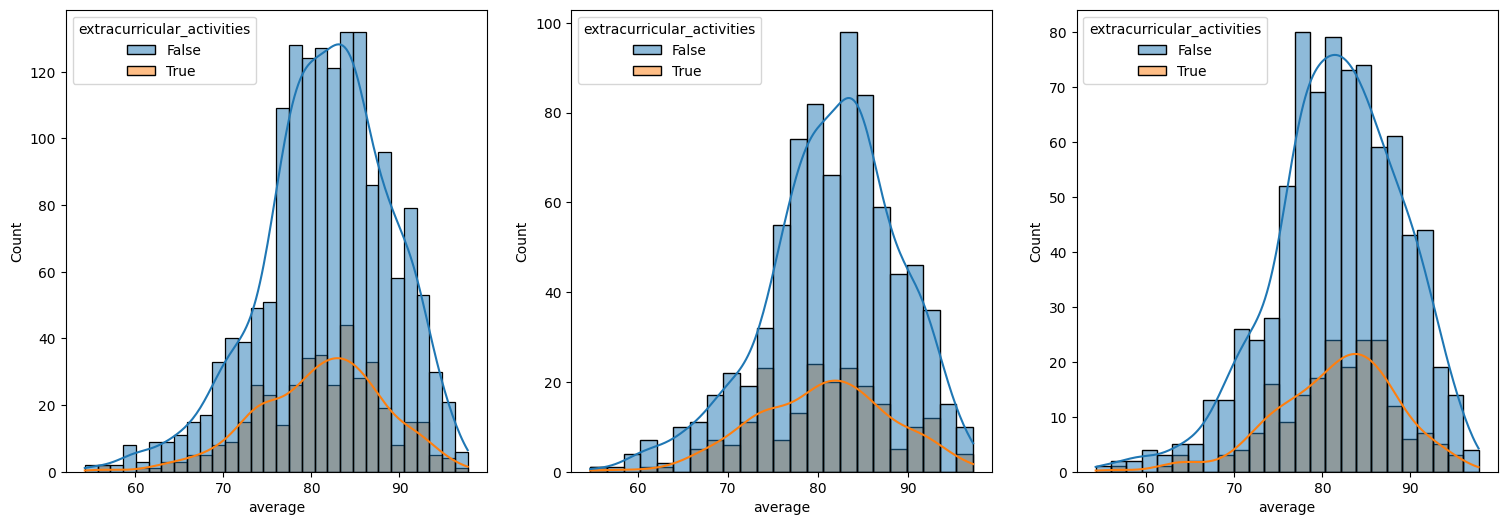

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='extracurricular_activities')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='extracurricular_activities')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='extracurricular_activities')
plt.show()

**Maximumum score of students in all four subjects**

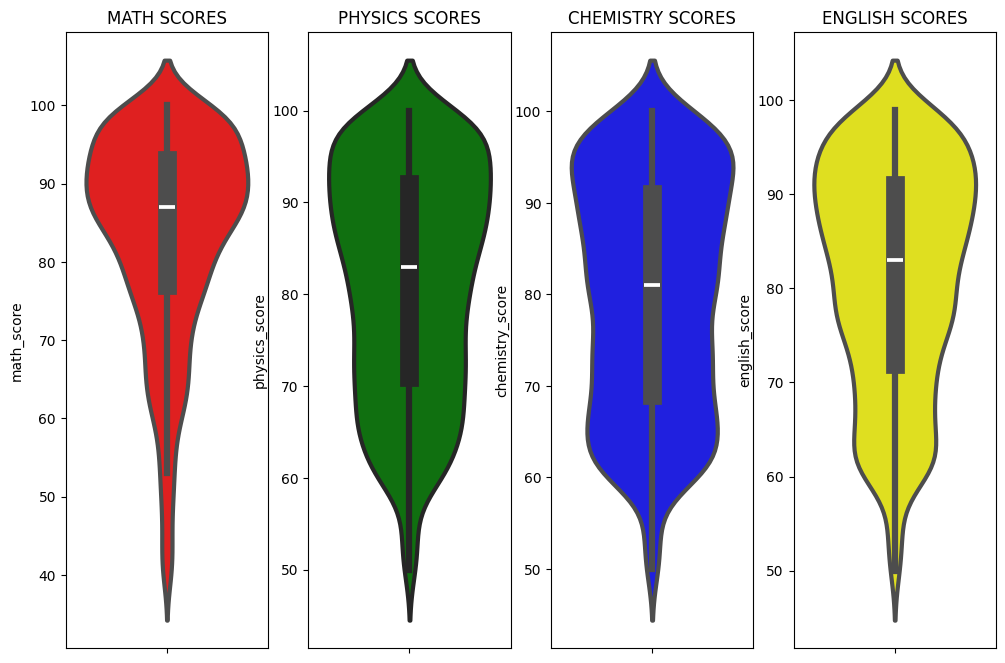

In [ ]:
plt.figure(figsize=(12,8))

# First subplot
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

# Second subplot
plt.subplot(1, 4, 2)
plt.title('PHYSICS SCORES')
sns.violinplot(y='physics_score', data=df, color='green', linewidth=3)

# Third subplot
plt.subplot(1, 4, 3)
plt.title('CHEMISTRY SCORES')
sns.violinplot(y='chemistry_score', data=df, color='blue', linewidth=3)

# Fourth subplot
plt.subplot(1, 4, 4)
plt.title('ENGLISH SCORES')
sns.violinplot(y='english_score', data=df, color='yellow', linewidth=3)

plt.show()


**Multivariate analysis using pieplot**

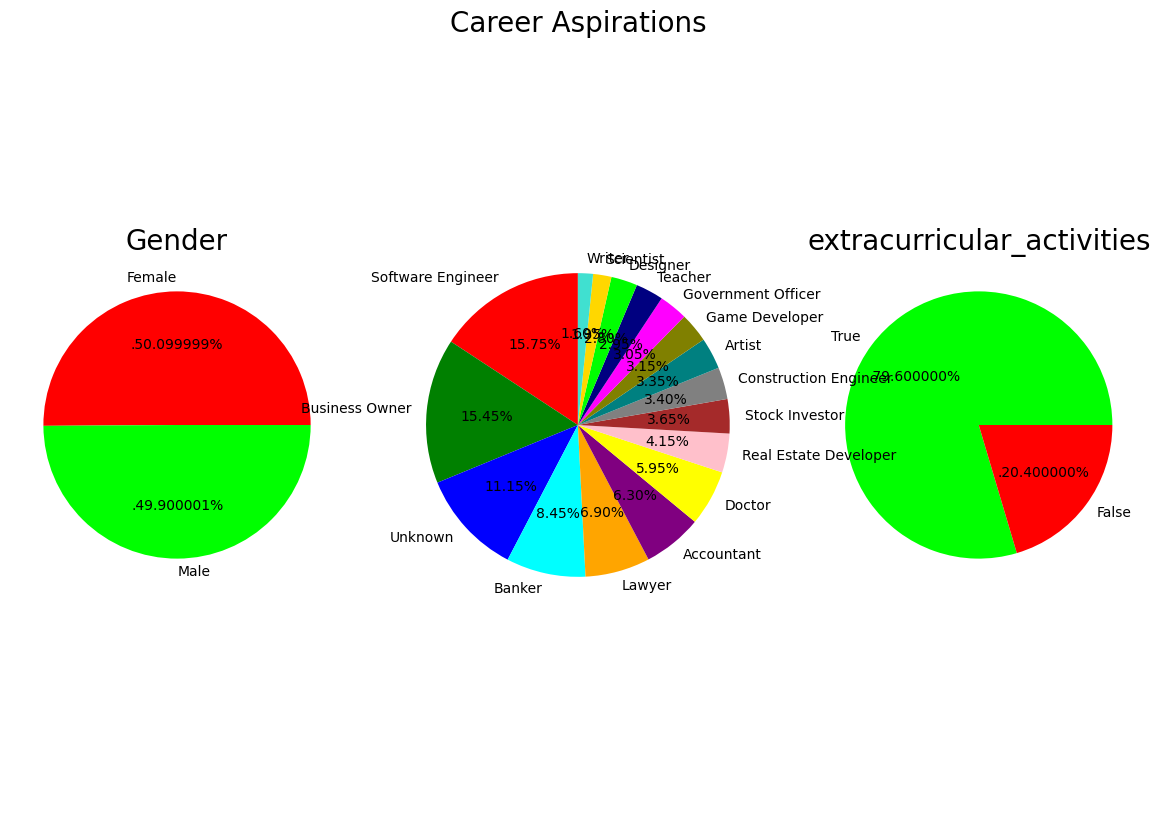

In [ ]:
plt.rcParams['figure.figsize'] = (25,10)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','lime']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['extracurricular_activities'].value_counts()
labels = 'True', 'False'
color = ['lime','red']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('extracurricular_activities', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['career_aspiration'].value_counts()

# Define the labels (unique career aspirations from the data)
labels = size.index
color = ['red', 'green', 'blue', 'cyan', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray',
         'teal', 'olive', 'magenta', 'navy', 'lime', 'gold', 'turquoise']

# Create the pie chart
plt.pie(size, colors=color[:len(labels)], labels=labels, autopct='%.2f%%', startangle=90)
plt.title('Career Aspirations', fontsize=20)
plt.axis('equal')

plt.grid()
plt.show()


# Feature Wise Visualization

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

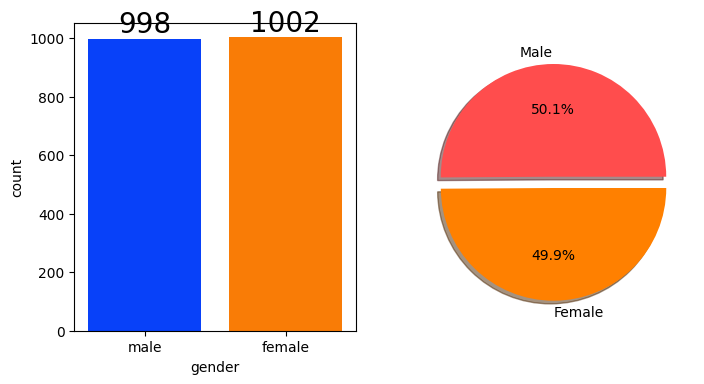

In [ ]:
f,ax=plt.subplots(1,2,figsize=(8,4))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**

Gender has balanced data with female students are 998 (50.1%) and male students are 1002 (49.9%)

**BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])

gender_group = numeric_columns.groupby(df['gender']).mean()

gender_group


id  absence_days  math_score  physics_score  chemistry_score  \
gender                                                                          
female  1003.846307      3.742515   82.792415      80.678643        80.382236   
male     997.140281      3.588176   84.114228      81.996994        79.606212   

        english_score  total score    average  
gender                                         
female      81.740519   325.593812  81.398453  
male        80.812625   326.530060  81.632515

<Figure size 200x200 with 0 Axes>

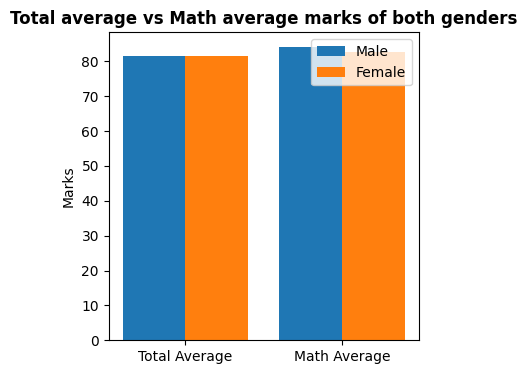

In [ ]:
plt.figure(figsize=(2,2))

X = ['Total Average', 'Math Average']

# Correctly access the values from gender_group using the column names
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

# Set the positions of the bars on the x-axis
X_axis = np.arange(len(X))

# Create the bar chart
plt.figure(figsize=(4, 4))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

# Set the x-axis labels and chart details
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both genders", fontweight='bold')
plt.legend()

# Display the plot
plt.show()

<Figure size 200x200 with 0 Axes>

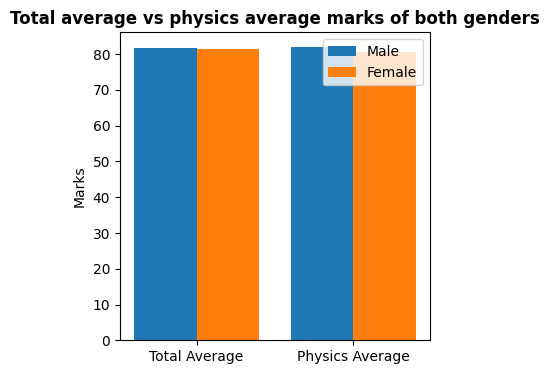

In [ ]:
plt.figure(figsize=(2,2))

X = ['Total Average', 'Physics Average']

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'physics_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'physics_score']]

X_axis = np.arange(len(X))

plt.figure(figsize=(4, 4))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs physics average marks of both genders", fontweight='bold')
plt.legend()

plt.show()

<Figure size 200x200 with 0 Axes>

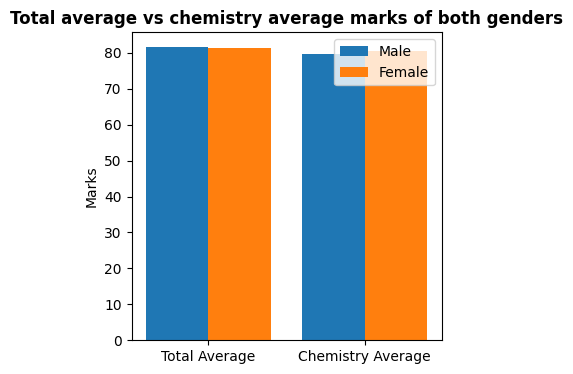

In [ ]:
plt.figure(figsize=(2,2))

X = ['Total Average', 'Chemistry Average']

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'chemistry_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'chemistry_score']]

X_axis = np.arange(len(X))

plt.figure(figsize=(4, 4))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs chemistry average marks of both genders", fontweight='bold')
plt.legend()

plt.show()

<Figure size 200x200 with 0 Axes>

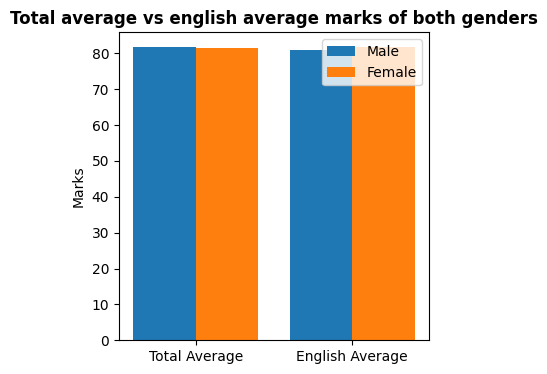

In [ ]:
plt.figure(figsize=(2,2))

X = ['Total Average', 'English Average']

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'english_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'english_score']]

X_axis = np.arange(len(X))

plt.figure(figsize=(4, 4))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs english average marks of both genders", fontweight='bold')
plt.legend()

plt.show()

**UNIVARIATE ANALYSIS** ( Which type of extrcurricular acitivities is most common amoung students ? )

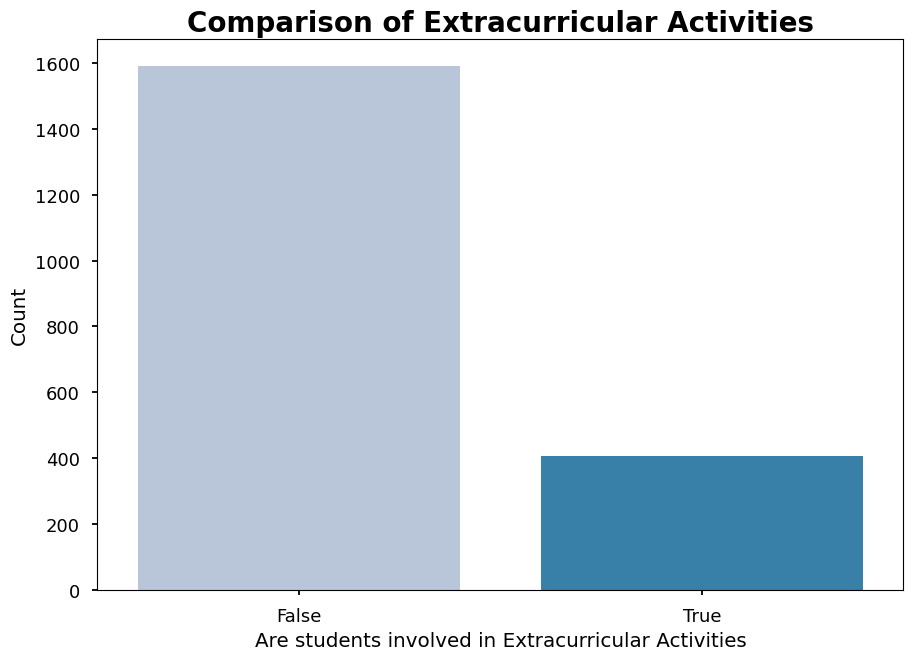

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-talk')

# Use x= explicitly to avoid deprecation warnings
sns.countplot(x='extracurricular_activities', data=df, palette='PuBu')

plt.title('Comparison of Extracurricular Activities', fontweight='bold', fontsize=20)
plt.xlabel('Are students involved in Extracurricular Activities')
plt.ylabel('Count')

plt.show()


**Bivariate Analysis:** Absence Days vs Gender (Boxplot)

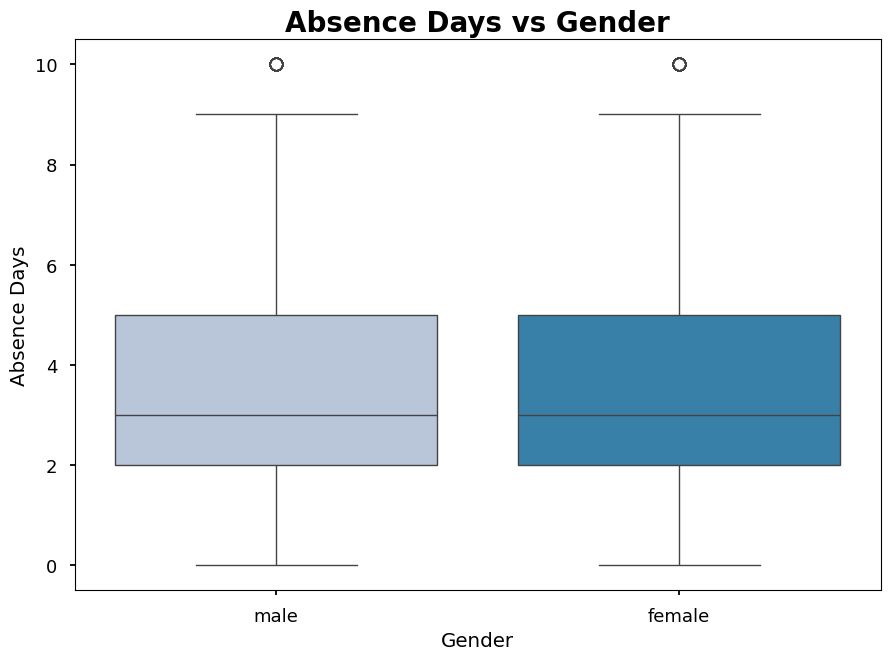

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-talk')

# Boxplot to see the distribution of absence_days across genders
sns.boxplot(x='gender', y='absence_days', data=df, palette='PuBu')

plt.title('Absence Days vs Gender', fontweight='bold', fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Absence Days')
plt.show()

**Bivariate Analysis:** Absence Days vs Average Score (Scatterplot)

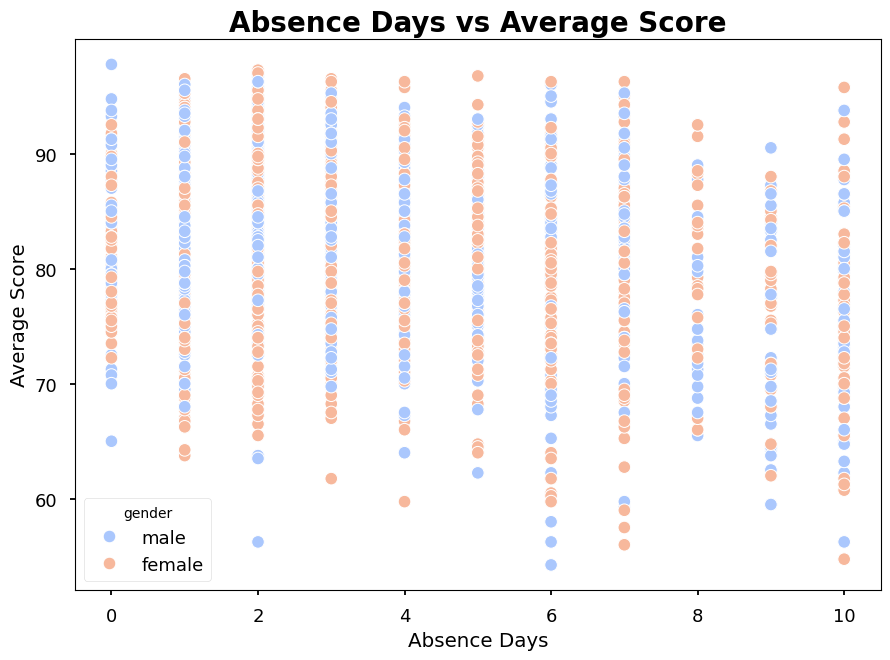

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-talk')

# Scatterplot to see the relationship between absence_days and average score
sns.scatterplot(x='absence_days', y='average', data=df, hue='gender', palette='coolwarm')

plt.title('Absence Days vs Average Score', fontweight='bold', fontsize=20)
plt.xlabel('Absence Days')
plt.ylabel('Average Score')
plt.show()


**Bivariate Analysis:** Absence Days vs Extracurricular Activities (Swarm Plot)

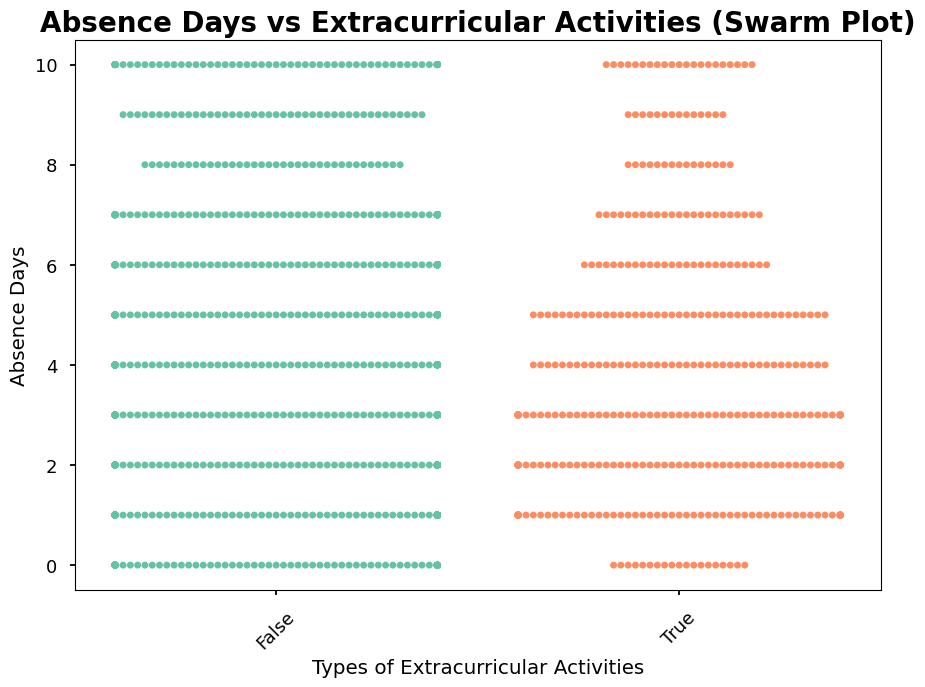

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-talk')

# Swarm plot to visualize individual data points for absence_days across extracurricular activities
sns.swarmplot(x='extracurricular_activities', y='absence_days', data=df, palette='Set2')

plt.title('Absence Days vs Extracurricular Activities (Swarm Plot)', fontweight='bold', fontsize=20)
plt.xlabel('Types of Extracurricular Activities')
plt.ylabel('Absence Days')
plt.xticks(rotation=45)
plt.show()



**CHECKING OUTLIERS**

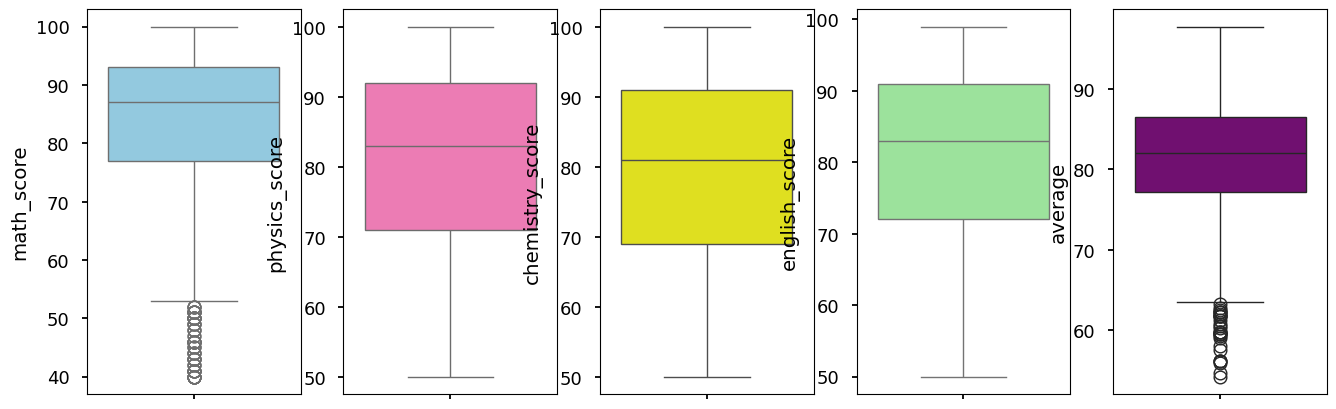

In [ ]:
plt.subplots(1,5,figsize=(16,5))
plt.subplot(151)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(152)
sns.boxplot(df['physics_score'],color='hotpink')
plt.subplot(153)
sns.boxplot(df['chemistry_score'],color='yellow')
plt.subplot(154)
sns.boxplot(df['english_score'],color='lightgreen')
plt.subplot(155)
sns.boxplot(df['average'],color='purple')
plt.show()

MUTIVARIATE ANALYSIS USING PAIRPLOT

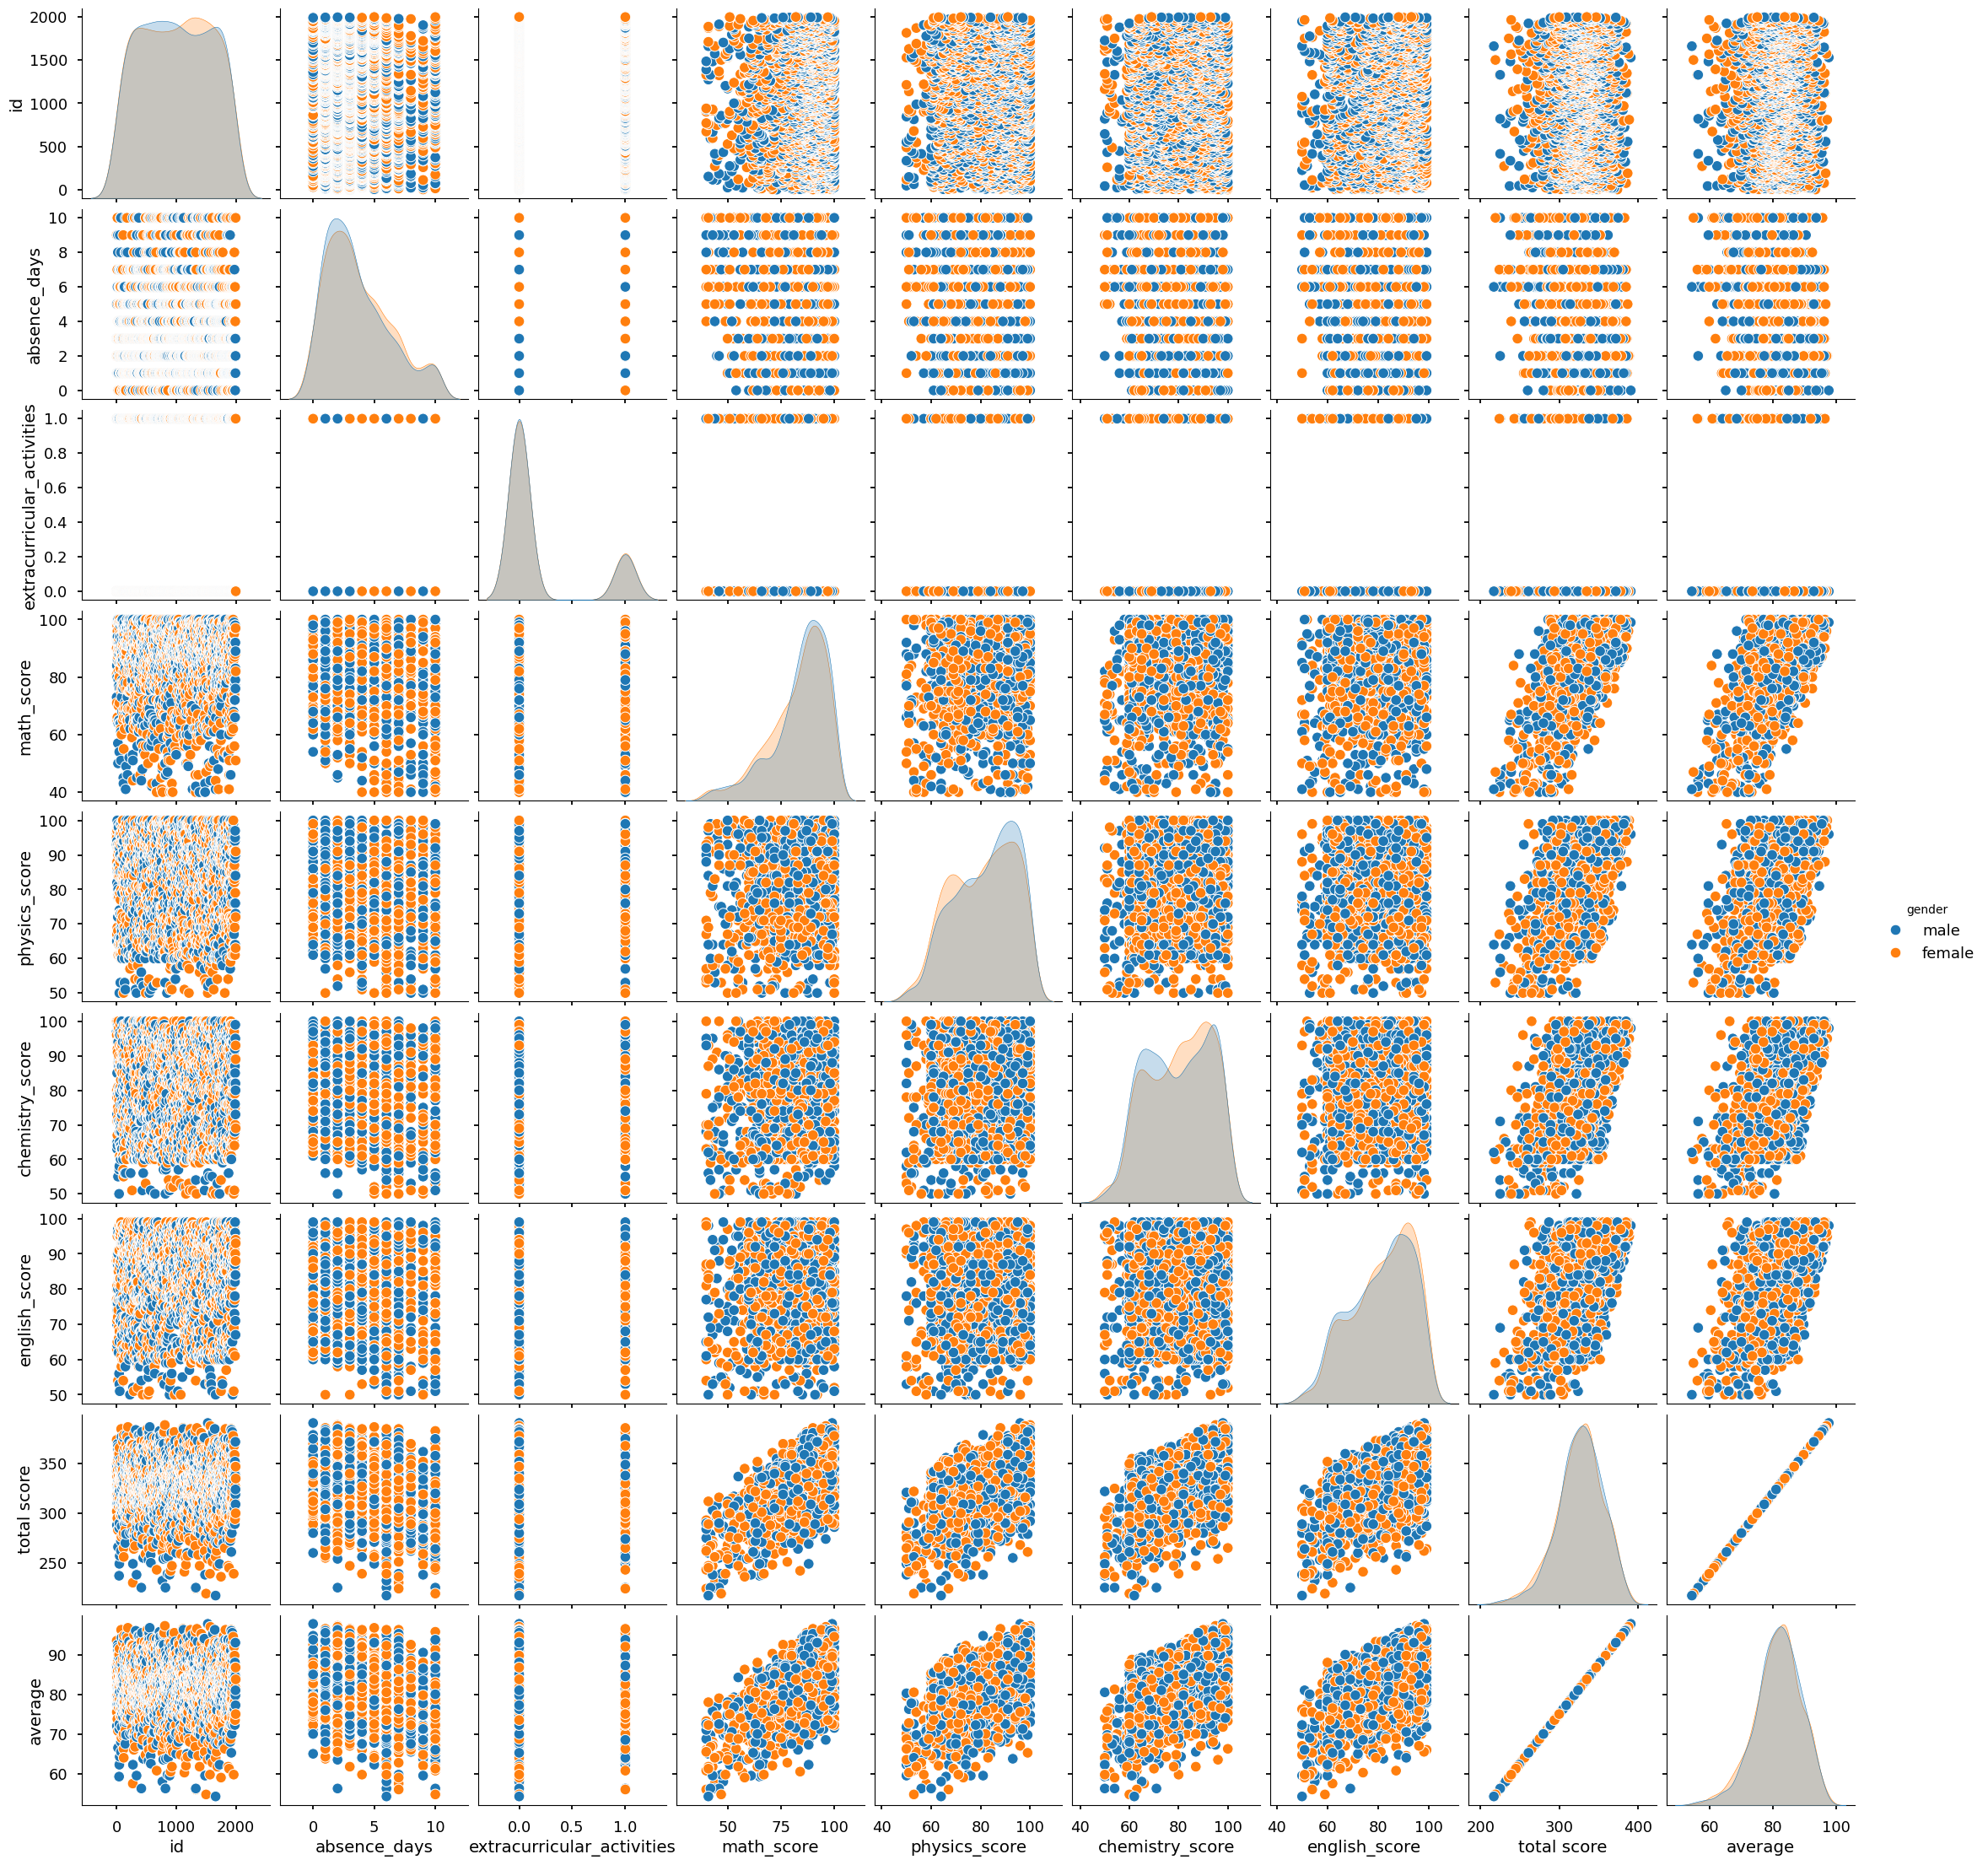

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

# **MODEL TRAINING**

In [ ]:
!pip install catboost

In [ ]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
# Drop columns that won't be used for training
df = df.drop(columns=['id', 'first_name', 'last_name', 'email'])

# Define features and target
X = df.drop(columns=['math_score'])
y = df['math_score']

# Check for missing values
print(df.isnull().sum())


gender                        0
absence_days                  0
extracurricular_activities    0
career_aspiration             0
math_score                    0
physics_score                 0
chemistry_score               0
english_score                 0
total score                   0
average                       0
dtype: int64


Split the Data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preprocessing with Column Transformer

In [ ]:
# Identify numerical and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Create transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', oh_transformer, cat_features)
    ])


Create a pipeline for Model Training

In [ ]:
# Define a Random Forest Regressor as the model
model = RandomForestRegressor()

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


 Train the Model

In [ ]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['absence_days', 'extracurricular_activities', 'physics_score',
       'chemistry_score', 'english_score', 'total score', 'average'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['gender', 'career_aspiration'], dtype='object'))])),
                ('model', RandomForestRegressor())])

Make Predictions

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)


 Evaluate the Model

In [ ]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score: {:.2f}%".format(r2 * 100))
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))


R^2 Score: 84.54%
Mean Absolute Error: 4.00
Mean Squared Error: 25.66
